In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=65635e81ad90047f195f209eabfb90248e27eeb1f0619d826e14836efc40a5ad
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


**1. Import all necessary packages**

In [ ]:
# Data handling and analysis libs
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
import pandas_ta as ta
from scipy import stats


# Financial Data
import yfinance as yf


# Machine Learning

# Model Development
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

# Model Selction and Optimization
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from keras.callbacks import EarlyStopping

# Model Evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, ConfusionMatrixDisplay, confusion_matrix


# Deep Learning
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

**2. Donwload stockdata and Pre-Process data**

In [ ]:
# Download data from yahoo finance
symbol = '^GSPC'  # S&P 500 data
df_raw = yf.download(symbol, start='2018-01-01', end='2023-01-01')
df_raw

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3397430000
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3544030000
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3697340000
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3239280000
2018-01-08,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3246160000
...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000


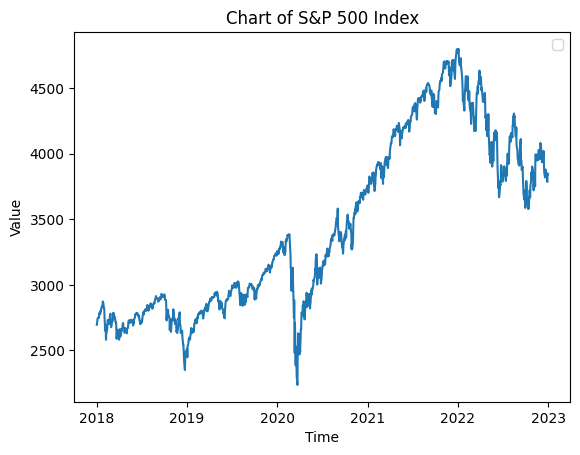

In [ ]:
plt.plot(df_raw['Adj Close'])
plt.title("Chart of S&P 500 Index")
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

In [ ]:
# Data Pre-processing and Cleaning
# Check for missing values
print(df_raw.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
# # Outlier removal with z-score
# z_scores = np.abs(stats.zscore(df_raw))
# threshold = 3
# df = df_raw[(z_scores < threshold).all(axis=1)].copy()
# print(f"{df_raw.shape[0]- df.shape[0]} outliers were detected and deleted")

In [ ]:
# Data preparation
df.loc[:, 'SMA_50'] = ta.sma(df['Adj Close'], length=50)
df.loc[:, 'SMA_200'] = ta.sma(df['Adj Close'], length=200)

df.loc[:, 'RSI'] = ta.rsi(df['Adj Close'])

df.loc[:, 'MACD'] = ta.macd(df['Adj Close'])['MACD_12_26_9']

df.loc[:, 'Previous Close'] = df['Adj Close'].shift(1)

df.loc[:, 'Price Up'] = np.where(df['Adj Close'] > df['Previous Close'], 1, 0)

NameError: name 'df' is not defined

In [ ]:
df

In [ ]:
# Drop rows with NaN values that may have been created by shifting operation
df.dropna(inplace=True)

In [ ]:
# Feature Selection
X = df[['Open', 'High', 'Low', 'Volume', 'Previous Close', 'SMA_50', 'SMA_200', 'RSI', 'MACD']]
y_reg = df['Adj Close']
y_class = df['Price Up']

In [ ]:
# Data Splitting
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=40)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

**Model Training and Evaluation**

***Linear Regression Model***

In [ ]:
# Model creation
lin_reg = LinearRegression()

# Model fit
lin_reg.fit(X_train_reg, y_train_reg)

# Model prediction
y_pred_lin_reg = lin_reg.predict(X_test_reg)

In [ ]:
# Cross-validation for Linear Regression
cv_scores_lin_reg = cross_val_score(lin_reg, X_train_reg, y_train_reg, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores_lin_reg = np.sqrt(-cv_scores_lin_reg)
print(f"Cross-Validation Scores: {-cv_scores_lin_reg}")
print(f"Cross-validated RMSE scores for Linear Regression: {cv_rmse_scores_lin_reg.mean()}")

Cross-Validation Scores: [221.65003219 173.76704744 226.06021064 217.5217793  149.78430824]
Cross-validated RMSE scores for Linear Regression: 14.018509392179542


In [ ]:
# Evaluating the Linear Regression model
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_lin_reg, squared=False))}")
print(f"MAE: {mean_absolute_error(y_test_reg, y_pred_lin_reg)}")
print(f"R^2: {r2_score(y_test_reg, y_pred_lin_reg)}")

RMSE: 3.8912851720938546
MAE: 9.817097998710109
R^2: 0.9994566672408375


***Random Forest Regressor***

In [ ]:
# Model creation
rf_reg = RandomForestRegressor(random_state=42)

In [ ]:
# Hyperparameter tuning
rf_reg_params_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Model fit
rf_reg_gs = GridSearchCV(rf_reg, rf_reg_params_grid, cv=5, scoring='neg_mean_squared_error')
rf_reg_gs.fit(X_train_reg, y_train_reg)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
# Print best parameters and score
print("Best Parameters: {}".format(rf_reg_gs.best_params_))
print("Best score is {}".format(-rf_reg_gs.best_score_))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best score is 473.9792104921545


In [ ]:
# Use best model for prediction
best_rf_reg = rf_reg_gs.best_estimator_
y_pred_rf_reg = best_rf_reg.predict(X_test_reg)

In [ ]:
# Cross-validation
cv_scores_rf_reg = cross_val_score(rf_reg, X_train_reg, y_train_reg, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores_rf_reg = np.sqrt(-cv_scores_rf_reg)
print(f"Cross-Validation Scores: {-cv_scores_rf_reg}")
print(f"Cross-validated RMSE score for Random Forest Regressor: {cv_rmse_scores_rf_reg.mean()}")

Cross-Validation Scores: [597.54575201 389.19565521 558.23542132 458.77938835 442.93498609]
Cross-validated RMSE score for Random Forest Regressor: 22.052990842275157


In [ ]:
# Evaluate the Random Forest Regressor
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_rf_reg, squared=False))}")
print(f"MAE: {mean_absolute_error(y_test_reg, y_pred_rf_reg)}")
print(f"R^2: {r2_score(y_test_reg, y_pred_rf_reg)}")

RMSE: 5.283823054442488
MAE: 15.624406911483145
R^2: 0.9981529157039617


***Gradient Boosting Regressor***

In [ ]:
# Model creation
gb_reg = GradientBoostingRegressor(random_state=42)

In [ ]:
# Hyperparameter tuning
gb_reg_params_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

In [ ]:
# Model fit
gb_reg_gs = GridSearchCV(gb_reg, gb_reg_params_grid, cv=5, scoring='neg_mean_squared_error')
gb_reg_gs.fit(X_train_reg, y_train_reg)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [ ]:
# Print best parameters and score
print(f"Best Parameters: {gb_reg_gs.best_params_}")
print(f"Best score: {np.sqrt(-gb_reg_gs.best_score_)}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best score: 21.34178902774618


In [ ]:
# Use the best model for prediction
best_gb_reg = gb_reg_gs.best_estimator_
y_pred_gb_reg = best_gb_reg.predict(X_test_reg)

In [ ]:
# Cross-validation
cv_scores_gb_reg = cross_val_score(gb_reg, X_train_reg, y_train_reg, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores_gb_reg = np.sqrt(-cv_scores_gb_reg)
print(f"Cross-Validation Scores: {-cv_scores_gb_reg}")
print(f"Cross-validated RMSE score for Gradient Boosting Regressor: {cv_rmse_scores_gb_reg.mean()}")

Cross-Validation Scores: [579.01624594 427.73515172 619.89482005 508.03515097 526.4793277 ]
Cross-validated RMSE score for Gradient Boosting Regressor: 23.02539496347175


In [ ]:
# Evaluation
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_gb_reg, squared=False))}")
print(f"MAE: {mean_absolute_error(y_test_reg, y_pred_gb_reg)}")
print(f"R^2: {r2_score(y_test_reg, y_pred_gb_reg)}")

RMSE: 5.061056323350257
MAE: 15.478146213719919
R^2: 0.9984452579810223


**Random Forest Classifier**


In [ ]:
# Model creation
rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
# Hyperparameter tuning
rf_clf_params_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Model fit
rf_clf_gs = GridSearchCV(rf_clf, rf_clf_params_grid, cv=5, scoring='neg_mean_squared_error')
rf_clf_gs.fit(X_train_class, y_train_class)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
# Print best parameters and score
print("Best Parameters: {}".format(rf_clf_gs.best_params_))
print("Best score is {}".format(-rf_clf_gs.best_score_))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best score is 0.336969696969697


In [ ]:
# Use best model for prediction
best_rf_clf = rf_clf_gs.best_estimator_
y_pred_rf_clf = best_rf_clf.predict(X_test_class)

In [ ]:
# Cross-validation for Random Forest Classifier
cv_scores_rf_clf = cross_val_score(rf_clf, X_test_class, y_test_class, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores_rf_clf = np.sqrt(-cv_scores_rf_clf)
print(f"Cross-Validation Scores: {-cv_scores_rf_clf}")
print(f"Cross-validated RMSE score for Random Forest Classifier: {cv_rmse_scores_rf_clf.mean()}")

Cross-Validation Scores: [0.47619048 0.35714286 0.36585366 0.48780488 0.53658537]
Cross-validated RMSE score for Random Forest Classifier: 0.6646976825442985


In [ ]:
# Evaluating the Random Forest Classifier model
print(f"Accuracy: {accuracy_score(y_test_class, y_pred_rf_clf)}")
print(f"Precision: {precision_score(y_test_class, y_pred_rf_clf, average='macro')}")
print(f"Recall: {recall_score(y_test_class, y_pred_rf_clf, average='macro')}")
print(f"F1 Score: {f1_score(y_test_class, y_pred_rf_clf, average='macro')}")

Accuracy: 0.6763285024154589
Precision: 0.6837560975609756
Recall: 0.6758308439133682
F1 Score: 0.6726307093119319


***Gradient Boosting Classifier***

In [ ]:
# Model creation
gb_clf = GradientBoostingClassifier(random_state=42)

In [ ]:
# Hyperparameter tuning
gb_clf_params_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

In [ ]:
# Model fit
gb_clf_gs = GridSearchCV(gb_clf, gb_clf_params_grid, cv=5, scoring='neg_mean_squared_error')
gb_clf_gs.fit(X_train_class, y_train_class)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [ ]:
# Print best parameters and score
print("Best Parameters: {}".format(gb_clf_gs.best_params_))
print("Best score is {}".format(-gb_clf_gs.best_score_))

Best Parameters: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best score is 0.32363636363636367


In [ ]:
# Use best model for prediction
best_gb_clf = gb_clf_gs.best_estimator_
y_pred_gb_clf = best_gb_clf.predict(X_test_class)

In [ ]:
# Cross-validation for Gradient Boosting Classifier
cv_scores_gb_clf = cross_val_score(gb_clf, X_test_class, y_test_class, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores_gb_clf = np.sqrt(-cv_scores_gb_clf)
print(f"Cross-Validation Scores: {-cv_scores_gb_clf}")
print(f"Cross-validated RMSE score for Random Forest Classifier: {cv_rmse_scores_gb_clf.mean()}")

Cross-Validation Scores: [0.33333333 0.33333333 0.34146341 0.46341463 0.46341463]
Cross-validated RMSE score for Random Forest Classifier: 0.6201081079160129


In [ ]:
# Evaluation
print(f"Accuracy: {accuracy_score(y_test_class, y_pred_gb_clf)}")
print(f"Precision: {precision_score(y_test_class, y_pred_gb_clf, average='macro')}")
print(f"Recall: {recall_score(y_test_class, y_pred_gb_clf, average='macro')}")
print(f"F1 Score: {f1_score(y_test_class, y_pred_gb_clf, average='macro')}")

Accuracy: 0.7101449275362319
Precision: 0.7102092284700168
Recall: 0.7100914861837192
F1 Score: 0.7100840336134453


***LSTM model***

In [ ]:
# Preprocessing
df = df_raw[['Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

In [ ]:
# Split data into train and test sets
train_size = int(len(df_scaled) * 0.8)
train_data = df_scaled[:train_size]
test_data = df_scaled[train_size:]

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
27/27 [==============================] - 7s 127ms/step - loss: 0.0422 - val_loss: 0.0114
Epoch 2/50
27/27 [==============================] - 3s 111ms/step - loss: 0.0047 - val_loss: 0.0245
Epoch 3/50
27/27 [==============================] - 3s 129ms/step - loss: 0.0039 - val_loss: 0.0060
Epoch 4/50
27/27 [==============================] - 4s 138ms/step - loss: 0.0036 - val_loss: 0.0012
Epoch 5/50
27/27 [==============================] - 3s 110ms/step - loss: 0.0032 - val_loss: 0.0043
Epoch 6/50
27/27 [==============================] - 3s 109ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 7/50
27/27 [==============================] - 4s 134ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 8/50
27/27 [==============================] - 4s 132ms/step - loss: 0.0036 - val_loss: 0.0047
Epoch 9/50
27/27 [==============================] - 3s 111ms/step - loss: 0.0035 - val_loss: 0.0023
Epoch 10/50
27/27 [==============================] - 3s 109ms/step - loss: 0.0029 - val_loss: 9.1993

In [ ]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse scaling
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

6/6 [==============================] - 0s 38ms/step


In [ ]:
# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
mse = mean_squared_error(y_train, train_predictions)
mae = mean_absolute_error(y_train, train_predictions)
mape = np.mean(np.abs((y_train - train_predictions) / train_predictions)) * 100
r2 = r2_score(y_train, train_predictions)

print(f"RMSE: {rmse:.3f}")
print(f"MSE: {mse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MAPE: {mape:.3f}")
print(f"R2: {r2:.3f}")

RMSE: 62.681
MSE: 3928.966
MAE: 44.350
MAPE: 1.349
R2: 0.990


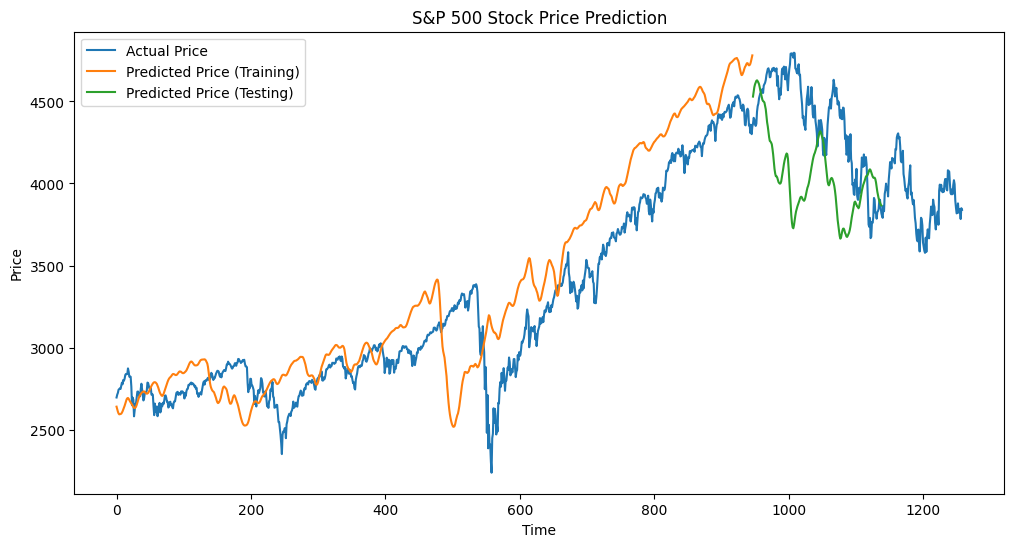

In [ ]:
# Visualization
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df_scaled), label='Actual Price')
plt.plot(train_predictions.flatten(), label='Predicted Price (Training)')
plt.plot(np.concatenate((np.full(train_size - seq_length, np.nan), test_predictions.flatten())), label='Predicted Price (Testing)')
plt.title('S&P 500 Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

**Print results**

In [ ]:
def plotResultsRegression(ax, y_true, y_pred, title):
  ax.scatter(y_true.index, y_true, color='blue', label='Actual', alpha=0.5, marker='o')
  ax.scatter(y_true.index, y_pred, color='red', label='Predicted', alpha=0.5, marker='x')
  ax.set_title(title)
  ax.set_xlabel('Index')
  ax.set_ylabel('Adjusted Close Price')
  ax.legend()

def plotResultsClassification(ax, y_true, y_pred, title):
  classes = ['Down', 'Up']
  actual_counts = y_true.value_counts().sort_index()
  predicted_counts = pd.Series(y_pred).value_counts().sort_index()
  ax.bar(classes, actual_counts, width=0.4, align='center', color='blue', label='Actual', alpha=0.5)
  ax.bar(classes, predicted_counts, width=0.4, align='edge', color='red', label='Predicted', alpha=0.5)
  ax.set_title(title)
  ax.set_ylabel('Count')
  ax.legend()

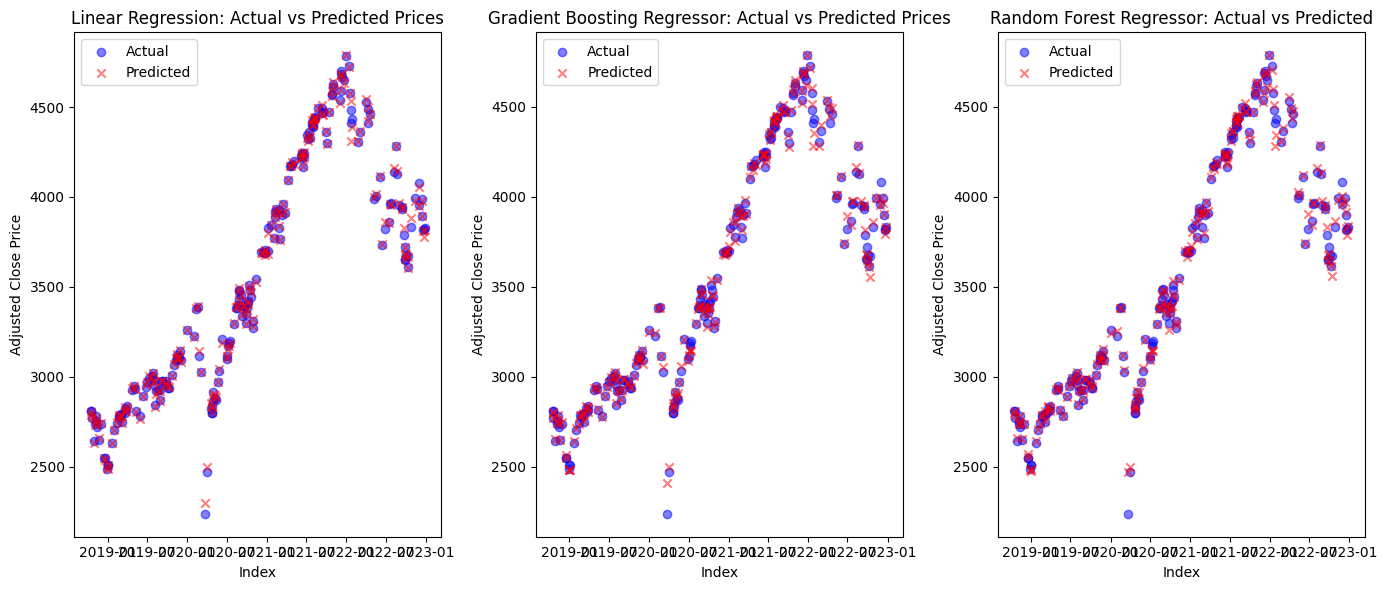

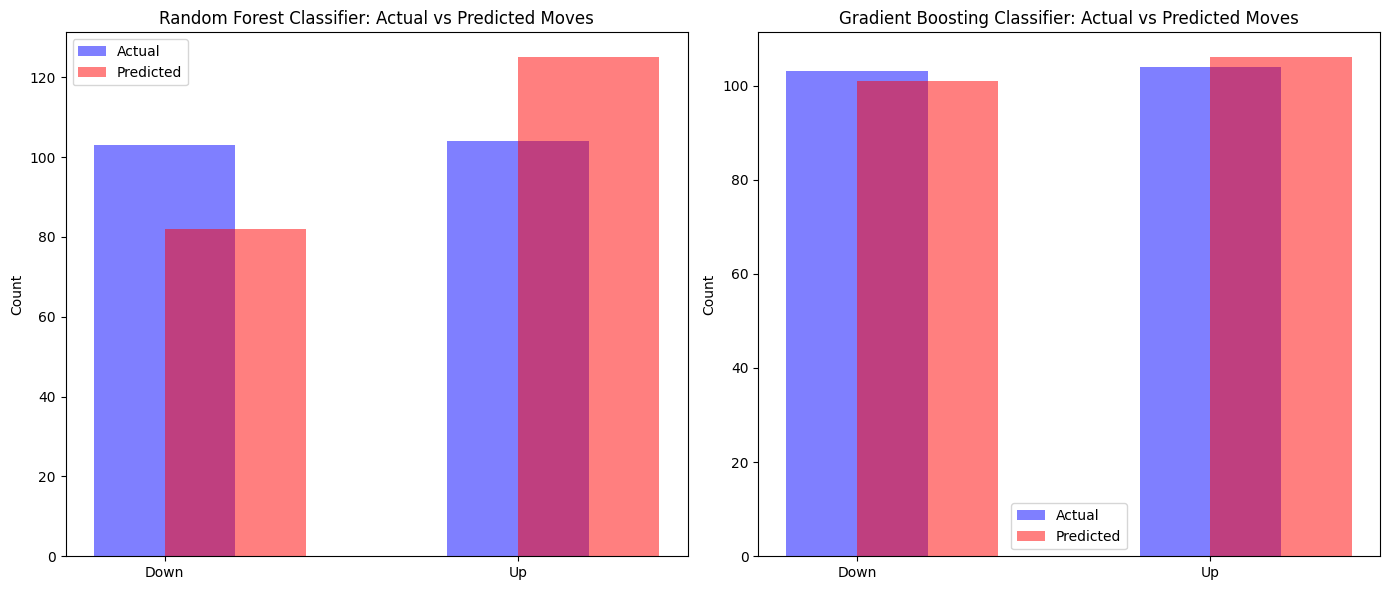

In [ ]:
# Plotting Regression Results
fig, axs = plt.subplots(1, 3, figsize=(14, 6))
plotResultsRegression(axs[0], y_test_reg, y_pred_lin_reg, 'Linear Regression: Actual vs Predicted Prices')
plotResultsRegression(axs[1], y_test_reg, y_pred_gb_reg, 'Gradient Boosting Regressor: Actual vs Predicted Prices')
plotResultsRegression(axs[2], y_test_reg, y_pred_rf_reg, 'Random Forest Regressor: Actual vs Predicted')
plt.tight_layout()
plt.show()

# Plotting Classification Results
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
plotResultsClassification(axs[0], y_test_class, y_pred_rf_clf, 'Random Forest Classifier: Actual vs Predicted Moves')
plotResultsClassification(axs[1], y_test_class, y_pred_gb_clf, 'Gradient Boosting Classifier: Actual vs Predicted Moves')
plt.tight_layout()
plt.show()

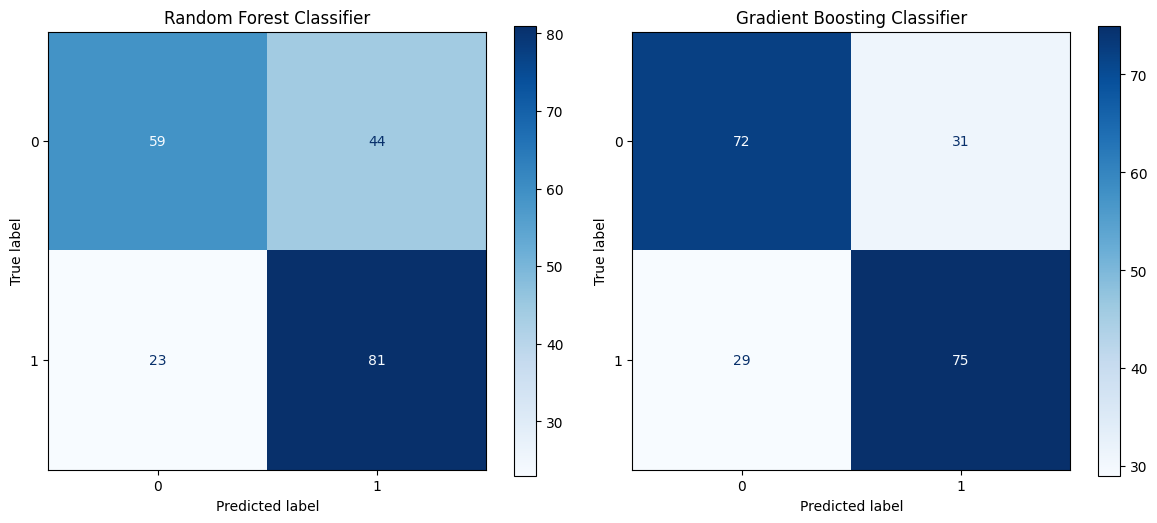

In [ ]:
# Generate the confusion matrix for Random Forest Classifier and Gradient Boosting Classifier
cm_rf = confusion_matrix(y_test_class, y_pred_rf_clf)
cm_gb = confusion_matrix(y_test_class, y_pred_gb_clf)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

class_labels = np.unique(y_test_class)

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=class_labels)
disp_rf.plot(cmap='Blues', ax=ax[0])
ax[0].set_title('Random Forest Classifier')

disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=class_labels)
disp_gb.plot(cmap='Blues', ax=ax[1])
ax[1].set_title('Gradient Boosting Classifier')

plt.tight_layout()
plt.show()